In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engine-dataset/test_FD003.txt
/kaggle/input/engine-dataset/train_FD003.txt
/kaggle/input/engine-dataset/RUL_FD003.txt


In [11]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
import os
for root,dirs,files in os.walk('/kaggle/'):
    for file in files:
        if 'FD003' in file:
            print(os.path.join(root, file))


/kaggle/input/engine-dataset/test_FD003.txt
/kaggle/input/engine-dataset/train_FD003.txt
/kaggle/input/engine-dataset/RUL_FD003.txt


In [18]:
train3 = pd.read_csv('/kaggle/input/engine-dataset/train_FD003.txt', sep=' ', header=None)
test3 = pd.read_csv('/kaggle/input/engine-dataset/test_FD003.txt', sep=' ', header=None)
rul = pd.read_csv('/kaggle/input/engine-dataset/RUL_FD003.txt', sep=' ', header=None)

In [19]:
print("Shape of 'train_FD003.txt' is: ",train3.shape)
print("Shape of 'test_FD003.txt' is: ",test3.shape)
print("Shape of 'RUL_FD003.txt' is: ",rul.shape)

Shape of 'train_FD003.txt' is:  (24720, 28)
Shape of 'test_FD003.txt' is:  (16596, 28)
Shape of 'RUL_FD003.txt' is:  (100, 2)


In [20]:
print("First 5 rows of 'train_FD003.txt' are: ")
train3.head()

First 5 rows of 'train_FD003.txt' are: 


0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8145.32  8.4246  0.03  391  2388  100.0  39.11  23.3537 NaN NaN  
1  ...  8152.85  8.4403  0.03  392  2388  100.0  38.99  23.4491 NaN NaN  
2  ...  8150.17  8.3901  0.03  391  2388  100.0  38.85  23.3669 NaN NaN  
3  ...  8146.56  8.3878  0.03  392  2388  100.0  38.96  23.2951 NaN NaN  
4  ...  8147.80  8.3869  0.03  392  2388  100.0  39.14  23.4583 NaN NaN  

[5 rows x 28 columns]

In [21]:
print("First 5 rows of 'test_FD003.txt' are: ")
test3.head()

First 5 rows of 'test_FD003.txt' are: 


0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0017 -0.0004  100.0  518.67  641.94  1581.93  1396.93  14.62   
1   1   2  0.0006 -0.0002  100.0  518.67  642.02  1584.86  1398.90  14.62   
2   1   3  0.0014 -0.0003  100.0  518.67  641.68  1581.78  1391.92  14.62   
3   1   4  0.0027  0.0001  100.0  518.67  642.20  1584.53  1395.34  14.62   
4   1   5 -0.0001  0.0001  100.0  518.67  642.46  1589.03  1395.86  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8133.48  8.3760  0.03  391  2388  100.0  39.07  23.4468 NaN NaN  
1  ...  8137.44  8.4062  0.03  391  2388  100.0  39.04  23.4807 NaN NaN  
2  ...  8138.25  8.3553  0.03  391  2388  100.0  39.10  23.4244 NaN NaN  
3  ...  8137.07  8.3709  0.03  392  2388  100.0  38.97  23.4782 NaN NaN  
4  ...  8134.20  8.4146  0.03  391  2388  100.0  39.09  23.3950 NaN NaN  

[5 rows x 28 columns]

In [29]:
## Providing the Feature names.

column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

In [31]:
print(train3.shape)
print(test3.shape)
print(len(column_names))

(24720, 28)
(16596, 28)
26


In [32]:
train3 = train3.iloc[:, :len(column_names)]
test3 = test3.iloc[:, :len(column_names)]
train3.columns = column_names
test3.columns = column_names

Where Feature names belongs to: "engine" : Engine No. "cycle" : Time, In Cycles: "setting1" : Operation Setting 1 "setting2" : Operation Setting 2 "setting3" : Operation Set Names: "sensor1" : Fan Inlet Temperature (◦R) "sensor2" : LPC Outlet Temperature (◦R) "sensor3" : HPC Outlet Temperature (◦R) "sensor4" : LPT Outlet Temperature (◦R) "sensor5" : Fan Inlet Pressure (psia) "sensor6" : Bypass-Duct Pressure (psia) "sensor7" : HPC Outlet Pressure (psia) "sensor8" : Physical Fan Speed (rpm) "sensor9" : Physical Core Speed (rpm) "sensor10" : Engine Pressure Ratio(P50/P2) "sensor11" : HPC Outlet Static Pressure (psia) "sensor12" : Ratio of Fuel Flow to Ps30 (pps/psia) "sensor13" : Corrected Fan Speed (rpm) "sensor14" : Corrected Core Speed (rpm) "sensor15" : Bypass Ratio "sensor16" : Burner Fuel-Air Ratio "sensor17" : Bleed Enthalpy "sensor18" : Required Fan Speed "sensor19" : Required Fan Conversion Speed "sensor20" : High-Pressure Turbines Cool Air Flow "sensor21" : Low-Pressure Turbines Cool Air Flow

In [34]:
print("\nInfo of 'train_FD003.txt' file is: \n")
train3.info()


Info of 'train_FD003.txt' file is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    24720 non-null  int64  
 1   cycle     24720 non-null  int64  
 2   setting1  24720 non-null  float64
 3   setting2  24720 non-null  float64
 4   setting3  24720 non-null  float64
 5   sensor1   24720 non-null  float64
 6   sensor2   24720 non-null  float64
 7   sensor3   24720 non-null  float64
 8   sensor4   24720 non-null  float64
 9   sensor5   24720 non-null  float64
 10  sensor6   24720 non-null  float64
 11  sensor7   24720 non-null  float64
 12  sensor8   24720 non-null  float64
 13  sensor9   24720 non-null  float64
 14  sensor10  24720 non-null  float64
 15  sensor11  24720 non-null  float64
 16  sensor12  24720 non-null  float64
 17  sensor13  24720 non-null  float64
 18  sensor14  24720 non-null  float64
 19  sensor15  24720 non-null  flo

In [35]:
print("\nInfo of 'test_FD003.txt' file is: \n")
test3.info()


Info of 'test_FD003.txt' file is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    16596 non-null  int64  
 1   cycle     16596 non-null  int64  
 2   setting1  16596 non-null  float64
 3   setting2  16596 non-null  float64
 4   setting3  16596 non-null  float64
 5   sensor1   16596 non-null  float64
 6   sensor2   16596 non-null  float64
 7   sensor3   16596 non-null  float64
 8   sensor4   16596 non-null  float64
 9   sensor5   16596 non-null  float64
 10  sensor6   16596 non-null  float64
 11  sensor7   16596 non-null  float64
 12  sensor8   16596 non-null  float64
 13  sensor9   16596 non-null  float64
 14  sensor10  16596 non-null  float64
 15  sensor11  16596 non-null  float64
 16  sensor12  16596 non-null  float64
 17  sensor13  16596 non-null  float64
 18  sensor14  16596 non-null  float64
 19  sensor15  16596 non-null  floa

In [36]:
print(f"\nNull Values of 'train_FD003.txt' file are: {train3.isnull().sum().sum()}\n\n{train3.isnull().sum()}")


Null Values of 'train_FD003.txt' file are: 0

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64


In [37]:
print(f"\nDuplicated values in 'train3' Dataframe are: {train3.duplicated().sum()}")


Duplicated values in 'train3' Dataframe are: 0


In [38]:
## Describing the train3 Dataframe.

print(f"Describing the 'train3' Dataframe: \n")
train3.describe().T

Describing the 'train3' Dataframe: 



count         mean           std        min        25%        50%  \
engine    24720.0    48.631877  2.934899e+01     1.0000    23.0000    47.0000   
cycle     24720.0   139.077063  9.884668e+01     1.0000    62.0000   124.0000   
setting1  24720.0    -0.000024  2.193545e-03    -0.0086    -0.0015    -0.0000   
setting2  24720.0     0.000005  2.940429e-04    -0.0006    -0.0002    -0.0000   
setting3  24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
sensor1   24720.0   518.670000  6.684921e-11   518.6700   518.6700   518.6700   
sensor2   24720.0   642.457858  5.230311e-01   640.8400   642.0800   642.4000   
sensor3   24720.0  1588.079175  6.810418e+00  1564.3000  1583.2800  1587.5200   
sensor4   24720.0  1404.471212  9.773178e+00  1377.0600  1397.1875  1402.9100   
sensor5   24720.0    14.620000  3.602525e-12    14.6200    14.6200    14.6200   
sensor6   24720.0    21.595841  1.811600e-02    21.4500    21.5800    21.6000   
sensor7   24720.0   555.143808  3.437343e+00   549.6100   553.1100   554.0500   
sensor8   24720.0  2388.071555  1.582849e-01  2386.9000  2388.0000  2388.0700   
sensor9   24720.0  9064.110809  1.998029e+01  9017.9800  9051.9200  9060.0100   
sensor10  24720.0     1.301232  3.484849e-03     1.2900     1.3000     1.3000   
sensor11  24720.0    47.415707  3.000742e-01    46.6900    47.1900    47.3600   
sensor12  24720.0   523.050873  3.255314e+00   517.7700   521.1500   521.9800   
sensor13  24720.0  2388.071643  1.581207e-01  2386.9300  2388.0100  2388.0700   
sensor14  24720.0  8144.202916  1.650412e+01  8099.6800  8134.5100  8141.2000   
sensor15  24720.0     8.396176  6.051161e-02     8.1563     8.3606     8.3983   
sensor16  24720.0     0.030000  1.750371e-14     0.0300     0.0300     0.0300   
sensor17  24720.0   392.566545  1.761459e+00   388.0000   391.0000   392.0000   
sensor18  24720.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
sensor19  24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
sensor20  24720.0    38.988552  2.488647e-01    38.1700    38.8300    38.9900   
sensor21  24720.0    23.393024  1.492338e-01    22.8726    23.2962    23.3916   

                75%        max  
engine      74.0000   100.0000  
cycle      191.0000   525.0000  
setting1     0.0015     0.0086  
setting2     0.0003     0.0007  
setting3   100.0000   100.0000  
sensor1    518.6700   518.6700  
sensor2    642.7900   645.1100  
sensor3   1592.4125  1615.3900  
sensor4   1410.6000  1441.1600  
sensor5     14.6200    14.6200  
sensor6     21.6100    21.6100  
sensor7    556.0400   570.4900  
sensor8   2388.1400  2388.6000  
sensor9   9070.0925  9234.3500  
sensor10     1.3000     1.3200  
sensor11    47.6000    48.4400  
sensor12   523.8400   537.4000  
sensor13  2388.1400  2388.6100  
sensor14  8149.2300  8290.5500  
sensor15     8.4370     8.5705  
sensor16     0.0300     0.0300  
sensor17   394.0000   399.0000  
sensor18  2388.0000  2388.0000  
sensor19   100.0000   100.0000  
sensor20    39.1400    39.8500  
sensor21    23.4833    23.9505

In [39]:
print(f"\nUnique categories of each feature in train3 Dataframe: {len(train3.columns)}\n\n{train3.nunique()}")


Unique categories of each feature in train3 Dataframe: 26

engine       100
cycle        525
setting1     160
setting2      14
setting3       1
sensor1        1
sensor2      334
sensor3     3358
sensor4     4383
sensor5        1
sensor6       17
sensor7     1854
sensor8      161
sensor9     7114
sensor10       4
sensor11     170
sensor12    1772
sensor13     163
sensor14    6320
sensor15    3122
sensor16       1
sensor17      12
sensor18       1
sensor19       1
sensor20     165
sensor21    6440
dtype: int64


Some of the features have 1 unique categories. Like in 'train3' Dataframe, 'setting3', 'sensor1', 'sensor5', 'sensor16', 'sensor18', 'sensor19'. These features are useless as they contains only one category so we have to remove these selected features from dataframe.

In [40]:
train3=train3.drop(columns=["setting3", "sensor1", "sensor5", "sensor16", "sensor18", "sensor19"])

In [41]:
test3=test3.drop(columns=["setting3", "sensor1", "sensor5", "sensor16", "sensor18", "sensor19"])

In [42]:
print(f"\nRemaining features of 'train3' Dataframe: {len(train3.columns)}\n\n{train3.columns}")


Remaining features of 'train3' Dataframe: 20

Index(['engine', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3',
       'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21'],
      dtype='object')


In [43]:
train3.head()

engine  cycle  setting1  setting2  sensor2  sensor3  sensor4  sensor6  \
0       1      1   -0.0005    0.0004   642.36  1583.23  1396.84    21.61   
1       1      2    0.0008   -0.0003   642.50  1584.69  1396.89    21.61   
2       1      3   -0.0014   -0.0002   642.18  1582.35  1405.61    21.61   
3       1      4   -0.0020    0.0001   642.92  1585.61  1392.27    21.61   
4       1      5    0.0016    0.0000   641.68  1588.63  1397.65    21.61   

   sensor7  sensor8  sensor9  sensor10  sensor11  sensor12  sensor13  \
0   553.97  2387.96  9062.17       1.3     47.30    522.31   2388.01   
1   554.55  2388.00  9061.78       1.3     47.23    522.42   2388.03   
2   554.43  2388.03  9070.23       1.3     47.22    522.03   2388.00   
3   555.21  2388.00  9064.57       1.3     47.24    522.49   2388.08   
4   554.74  2388.04  9076.14       1.3     47.15    522.58   2388.03   

   sensor14  sensor15  sensor17  sensor20  sensor21  
0   8145.32    8.4246       391     39.11   23.3537  
1   8152.85    8.4403       392     38.99   23.4491  
2   8150.17    8.3901       391     38.85   23.3669  
3   8146.56    8.3878       392     38.96   23.2951  
4   8147.80    8.3869       392     39.14   23.4583

In [44]:
print(f"\nUnique categories of engines in 'train3' Dataframe are: {len(train3['engine'].unique())} \n\n{train3['engine'].unique()}")


Unique categories of engines in 'train3' Dataframe are: 100 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [45]:
print("Max cycle counts of engines in 'train3' DataFrame:")
train3.groupby("engine")["cycle"].max()

Max cycle counts of engines in 'train3' DataFrame:


engine
1      259
2      253
3      222
4      272
5      213
      ... 
96     491
97     275
98     307
99     145
100    152
Name: cycle, Length: 100, dtype: int64

In [46]:
c=train3["cycle"].max()
print(f"highest cycle count in a sinlge Engine in 'train3' Dataframe is: {c}")

highest cycle count in a sinlge Engine in 'train3' Dataframe is: 525


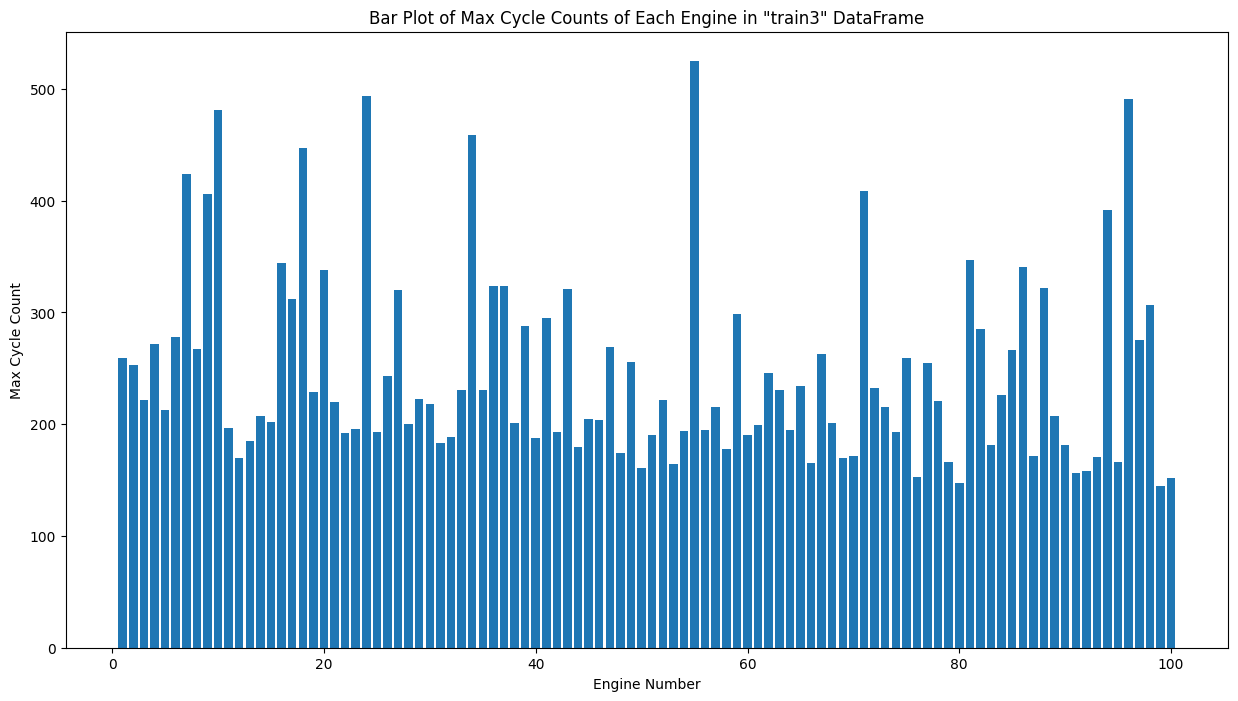

In [47]:
import matplotlib.pyplot as plt

# Calculate max cycle count for each engine
max_cycles = train3.groupby("engine")["cycle"].max()

# Plot the bar chart
plt.figure(figsize=(15, 8))
plt.bar(max_cycles.index, max_cycles.values)

# Add labels and title
plt.xlabel('Engine Number')
plt.ylabel('Max Cycle Count')
plt.title('Bar Plot of Max Cycle Counts of Each Engine in "train3" DataFrame')

# Show the plot
plt.show()

In [48]:
## Finding engine Number of highest cycle count.

df3=train3.groupby('engine')[['cycle']].max()
df3[df3['cycle'] == 525]

cycle
engine       
55        525

In [49]:
## Defining the function to calculate the RUL.

def Calculate_RUL(df):
    max_cycles = df.groupby('engine')['cycle'].max()
    merged = df.merge(max_cycles.to_frame(name='max_time_cycle'), left_on='engine',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['cycle']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [50]:
train3=Calculate_RUL(train3)

In [51]:
print(f"\nRemaining features of 'train3' Dataframe: {len(train3.columns)}\n\n{train3.columns}")


Remaining features of 'train3' Dataframe: 21

Index(['engine', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3',
       'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21', 'RUL'],
      dtype='object')


In [52]:
train3.head()

engine  cycle  setting1  setting2  sensor2  sensor3  sensor4  sensor6  \
0       1      1   -0.0005    0.0004   642.36  1583.23  1396.84    21.61   
1       1      2    0.0008   -0.0003   642.50  1584.69  1396.89    21.61   
2       1      3   -0.0014   -0.0002   642.18  1582.35  1405.61    21.61   
3       1      4   -0.0020    0.0001   642.92  1585.61  1392.27    21.61   
4       1      5    0.0016    0.0000   641.68  1588.63  1397.65    21.61   

   sensor7  sensor8  ...  sensor10  sensor11  sensor12  sensor13  sensor14  \
0   553.97  2387.96  ...       1.3     47.30    522.31   2388.01   8145.32   
1   554.55  2388.00  ...       1.3     47.23    522.42   2388.03   8152.85   
2   554.43  2388.03  ...       1.3     47.22    522.03   2388.00   8150.17   
3   555.21  2388.00  ...       1.3     47.24    522.49   2388.08   8146.56   
4   554.74  2388.04  ...       1.3     47.15    522.58   2388.03   8147.80   

   sensor15  sensor17  sensor20  sensor21  RUL  
0    8.4246       391     39.11   23.3537  258  
1    8.4403       392     38.99   23.4491  257  
2    8.3901       391     38.85   23.3669  256  
3    8.3878       392     38.96   23.2951  255  
4    8.3869       392     39.14   23.4583  254  

[5 rows x 21 columns]

In [53]:
## Defining a function to plot signal plots.

def plot_signal(df,col):
    plt.figure(figsize=(13,5))
    for i in df['engine'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', col, data=df[df['engine']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(col)
    plt.xlabel('Remaining Useful Life')
    plt.show()

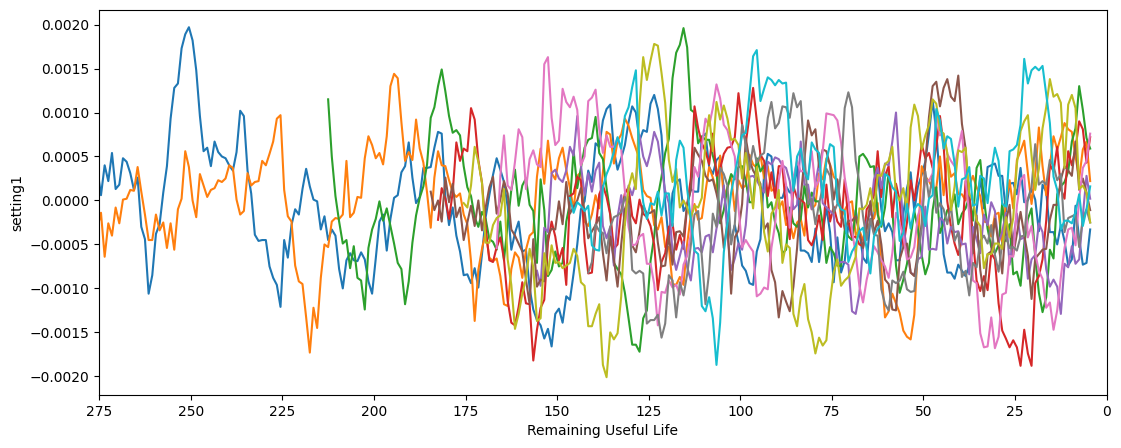

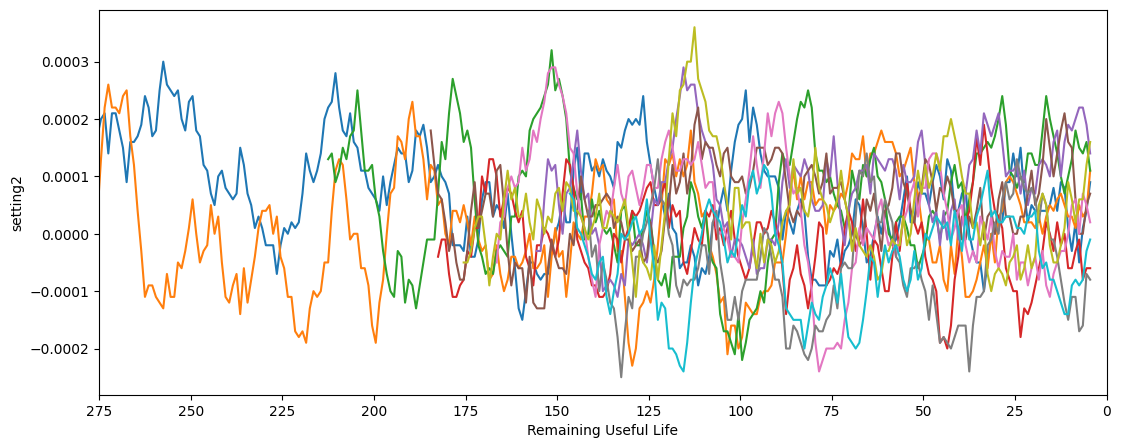

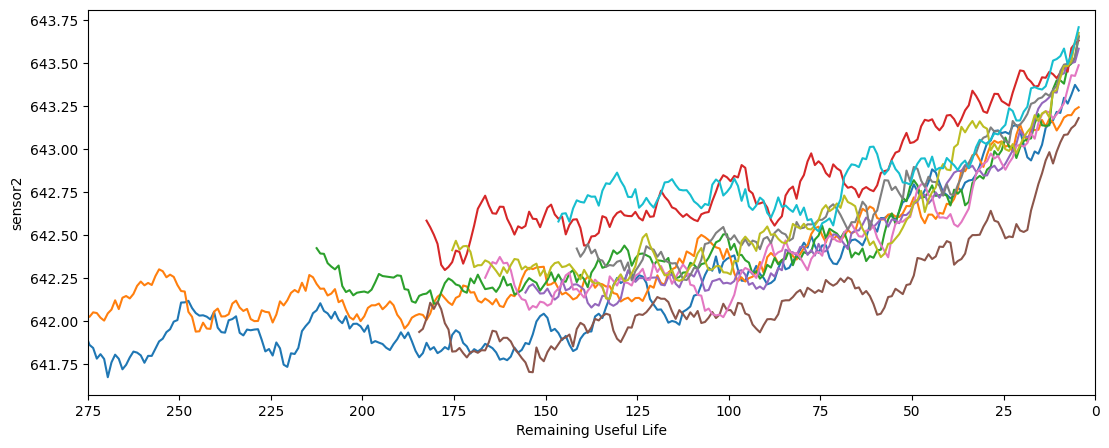

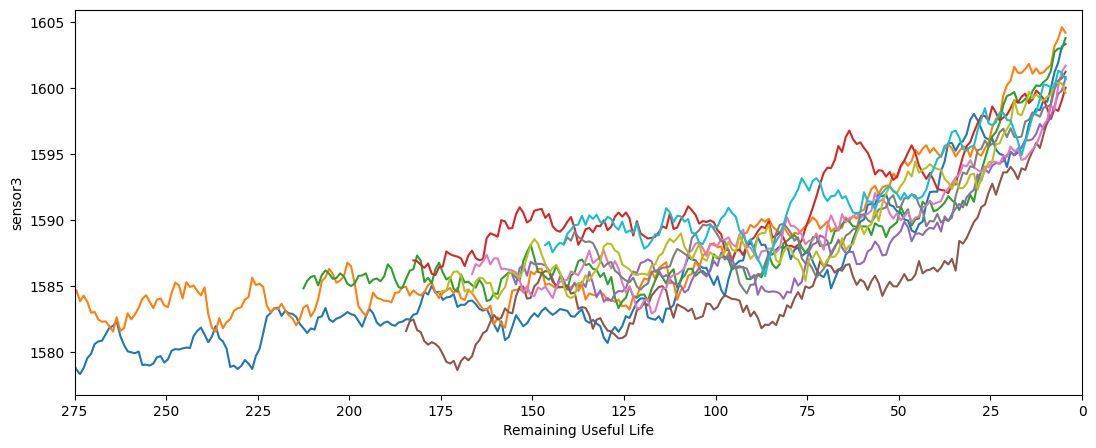

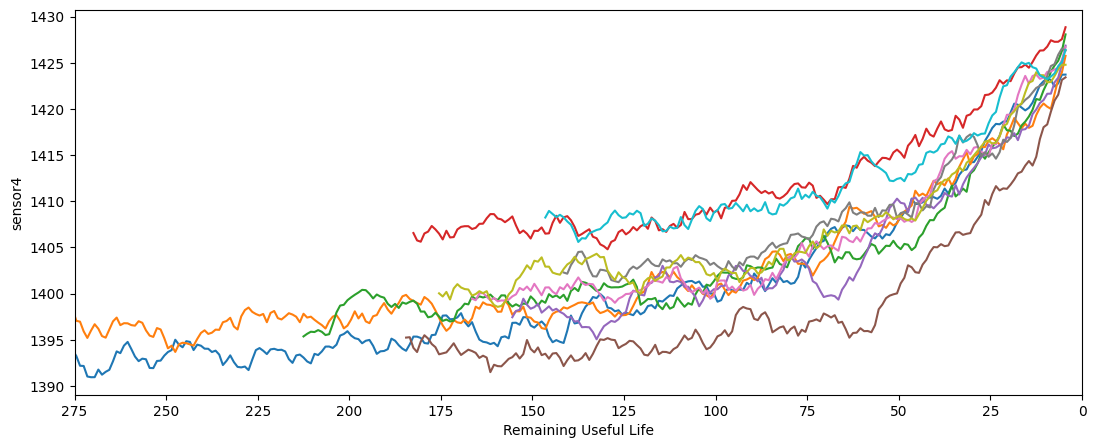

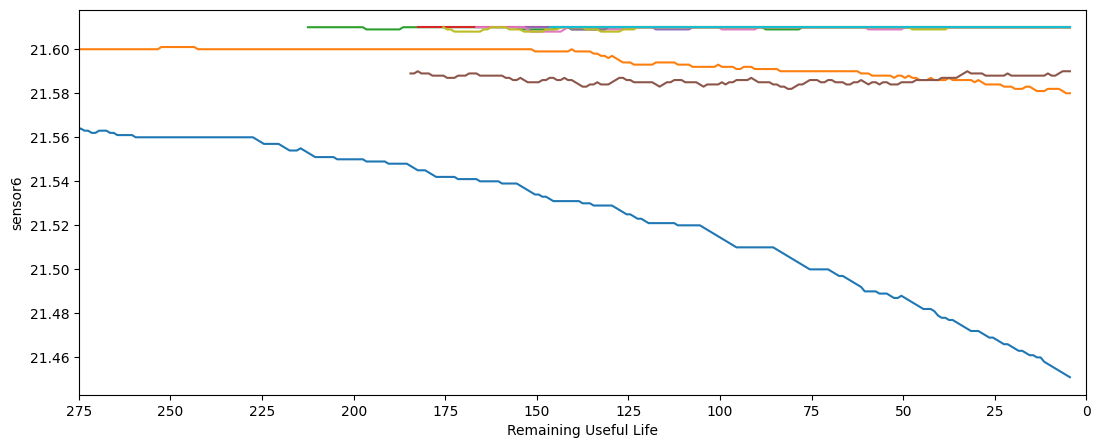

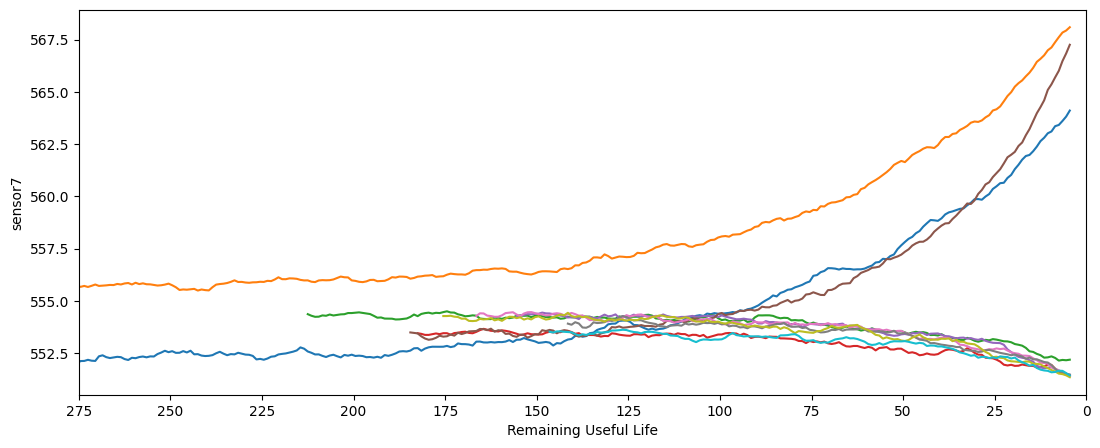

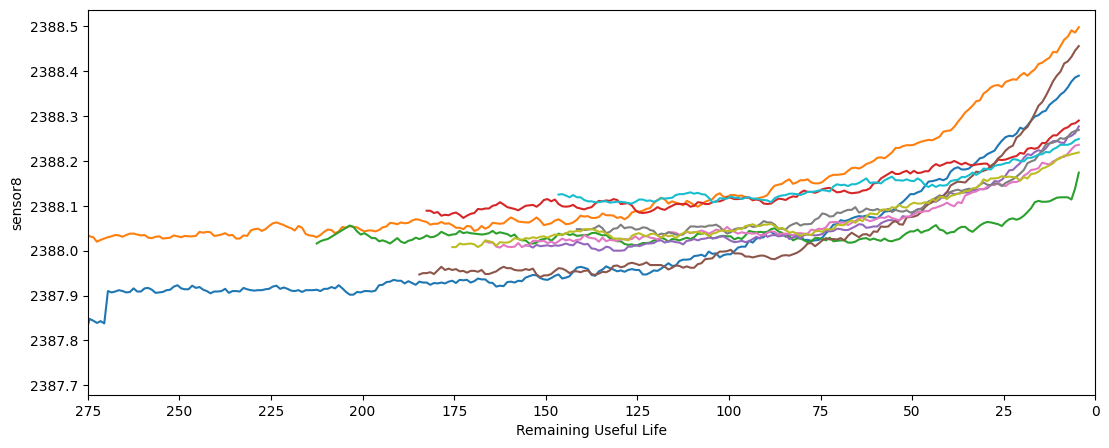

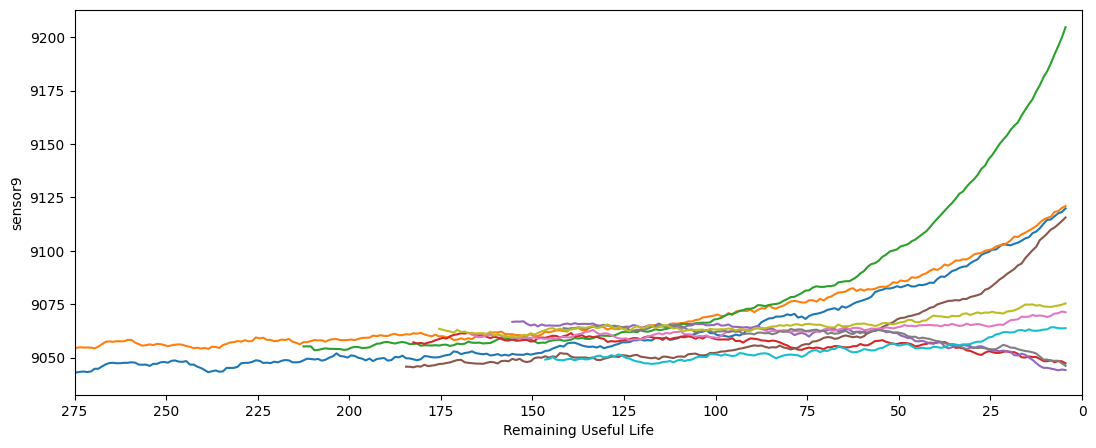

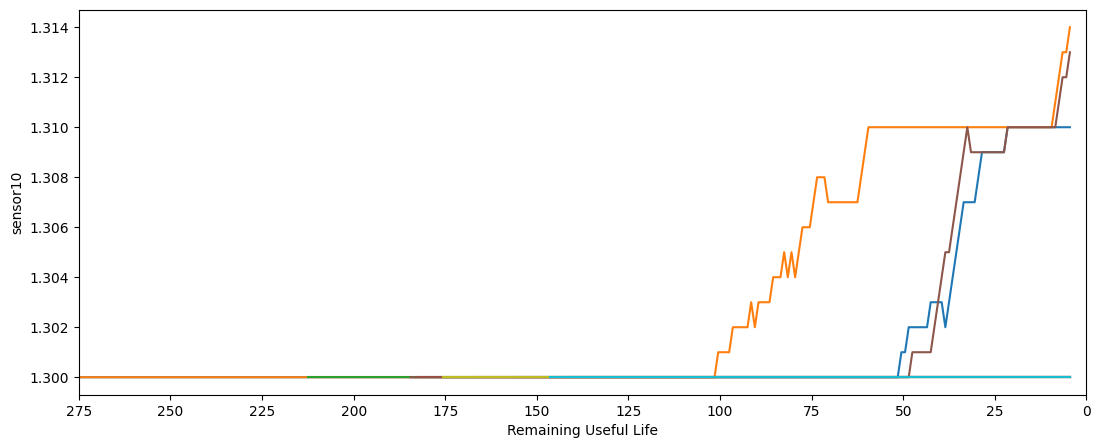

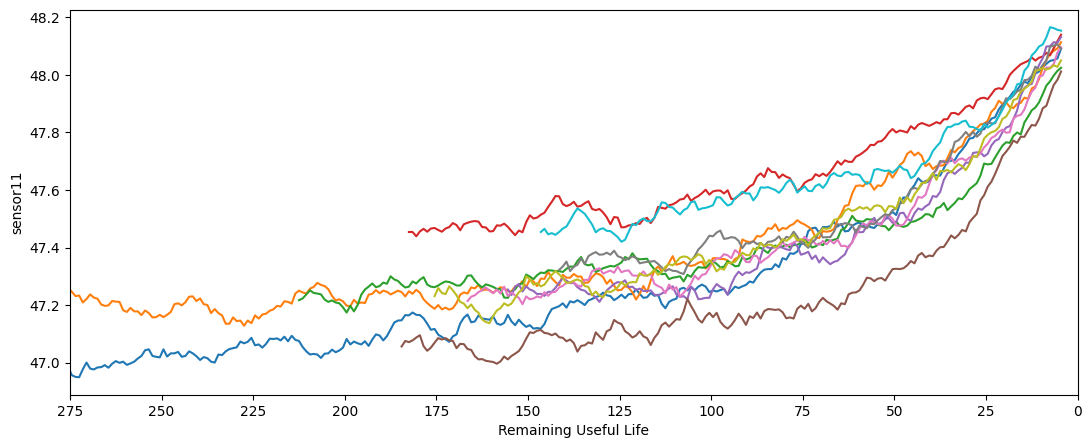

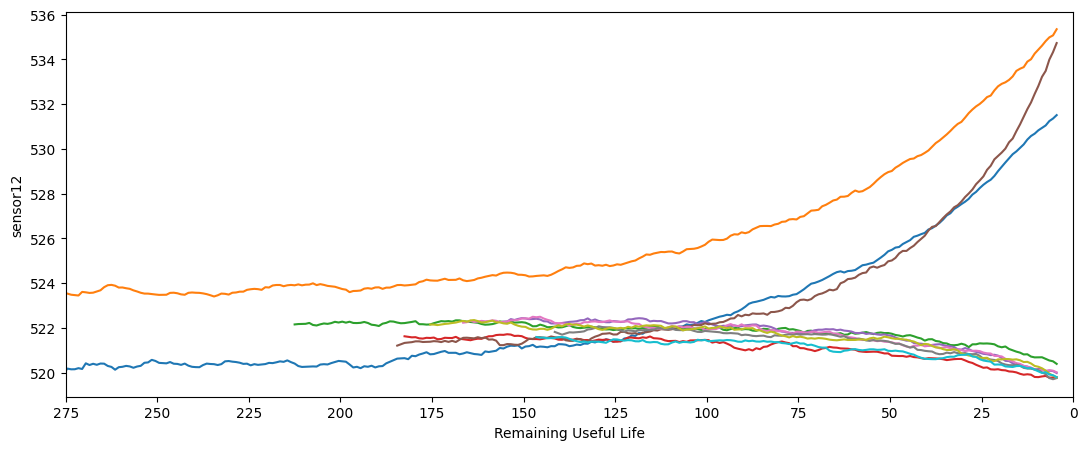

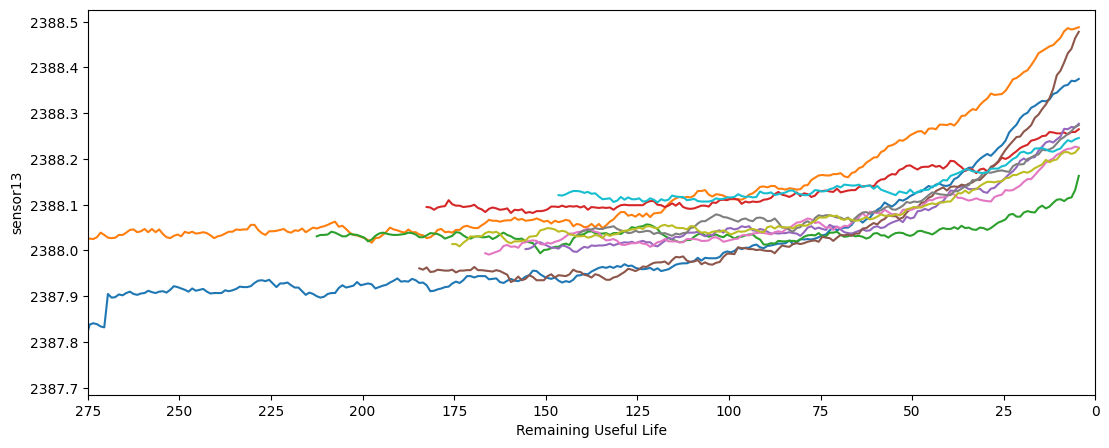

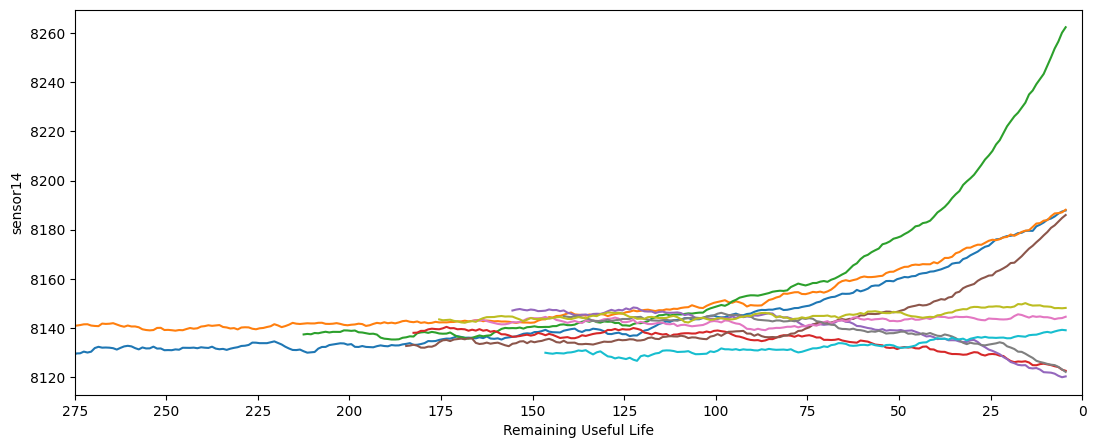

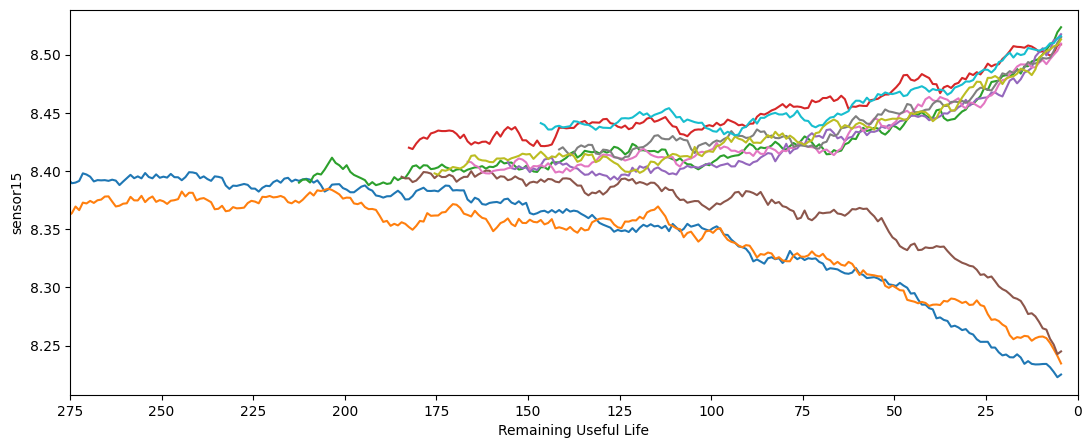

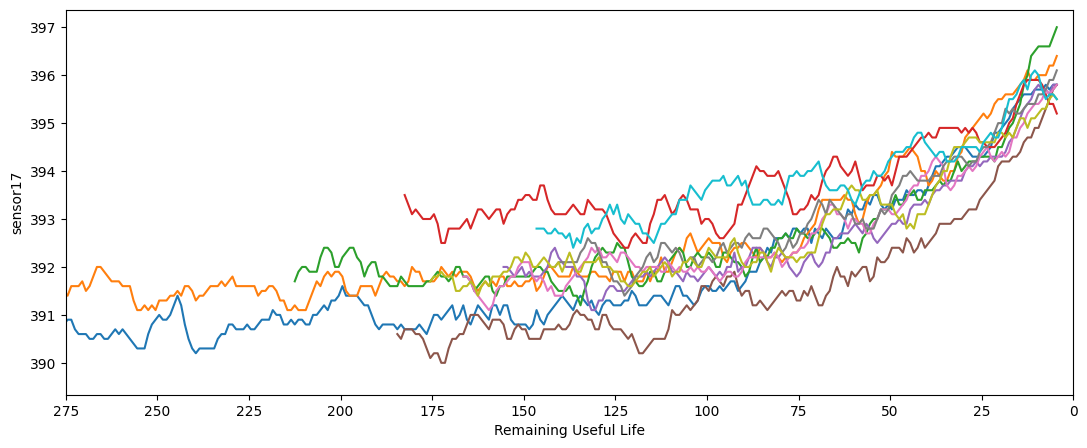

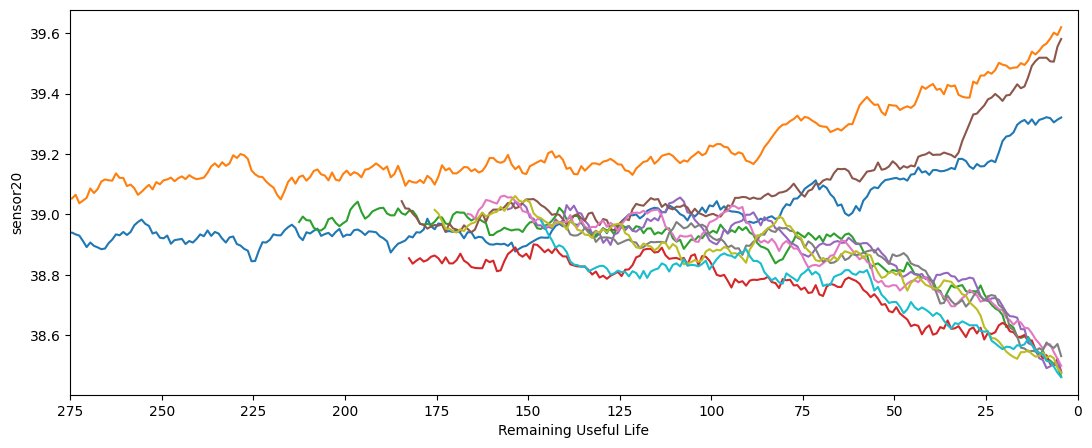

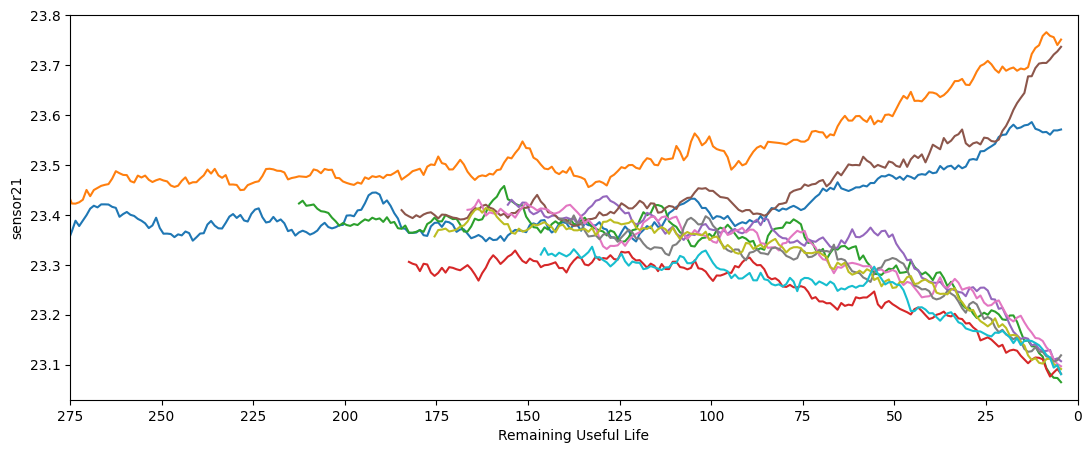

In [54]:
## Removing useless features from 'train3' Dataframe for plotting signal plot.

cols3=train3.drop(columns=['engine', 'cycle', 'RUL'])
cols3=cols3.columns
for col3 in cols3:
    plot_signal(train3,col3)

In [55]:
train3.corr()

engine     cycle  setting1  setting2   sensor2   sensor3  \
engine    1.000000 -0.077196 -0.002637 -0.016477  0.021424  0.027339   
cycle    -0.077196  1.000000 -0.003205  0.003410  0.300798  0.373506   
setting1 -0.002637 -0.003205  1.000000  0.001226 -0.002098 -0.004154   
setting2 -0.016477  0.003410  0.001226  1.000000  0.005117  0.005186   
sensor2   0.021424  0.300798 -0.002098  0.005117  1.000000  0.640503   
sensor3   0.027339  0.373506 -0.004154  0.005186  0.640503  1.000000   
sensor4   0.024376  0.361937  0.000811  0.004128  0.745167  0.716890   
sensor6   0.070735 -0.418590 -0.000051 -0.006029  0.314799  0.269463   
sensor7   0.064626  0.531015 -0.002498 -0.002446  0.124167  0.282007   
sensor8   0.050085  0.438111 -0.001344  0.000628  0.533915  0.637926   
sensor9   0.052341  0.507838 -0.007728  0.012311  0.441283  0.535074   
sensor10  0.029120  0.528220 -0.005541 -0.002698  0.256388  0.367705   
sensor11  0.029192  0.407412 -0.003287  0.002195  0.762269  0.746093   
sensor12  0.065447  0.538197 -0.003288 -0.001333  0.141785  0.298941   
sensor13  0.048920  0.437563 -0.002467 -0.001413  0.532745  0.636513   
sensor14  0.051634  0.488564 -0.008939  0.015843  0.343954  0.454205   
sensor15 -0.035267 -0.400594  0.007104  0.002108  0.232947  0.076820   
sensor17  0.027530  0.386185  0.001679  0.003078  0.670062  0.677216   
sensor20  0.047705  0.304585 -0.005606 -0.001032 -0.246286 -0.091851   
sensor21  0.046634  0.311020 -0.001452 -0.003564 -0.241318 -0.089035   
RUL      -0.077196 -0.482744  0.003700 -0.001204 -0.590564 -0.624236   

           sensor4   sensor6   sensor7   sensor8  ...  sensor10  sensor11  \
engine    0.024376  0.070735  0.064626  0.050085  ...  0.029120  0.029192   
cycle     0.361937 -0.418590  0.531015  0.438111  ...  0.528220  0.407412   
setting1  0.000811 -0.000051 -0.002498 -0.001344  ... -0.005541 -0.003287   
setting2  0.004128 -0.006029 -0.002446  0.000628  ... -0.002698  0.002195   
sensor2   0.745167  0.314799  0.124167  0.533915  ...  0.256388  0.762269   
sensor3   0.716890  0.269463  0.282007  0.637926  ...  0.367705  0.746093   
sensor4   1.000000  0.319139  0.181976  0.601272  ...  0.330834  0.854030   
sensor6   0.319139  1.000000 -0.208690  0.247480  ... -0.184268  0.305777   
sensor7   0.181976 -0.208690  1.000000  0.596510  ...  0.830550  0.270774   
sensor8   0.601272  0.247480  0.596510  1.000000  ...  0.547105  0.660209   
sensor9   0.509782  0.065131  0.579004  0.578587  ...  0.560163  0.546839   
sensor10  0.330834 -0.184268  0.830550  0.547105  ...  1.000000  0.405592   
sensor11  0.854030  0.305777  0.270774  0.660209  ...  0.405592  1.000000   
sensor12  0.202106 -0.200906  0.988725  0.608298  ...  0.836185  0.290664   
sensor13  0.601254  0.247099  0.597169  0.964052  ...  0.547460  0.659375   
sensor14  0.404686  0.008579  0.601013  0.519624  ...  0.555604  0.441050   
sensor15  0.216773  0.485677 -0.826574 -0.238368  ... -0.631628  0.144079   
sensor17  0.749907  0.285658  0.285796  0.662618  ...  0.377688  0.783722   
sensor20 -0.235016 -0.345912  0.802838  0.241726  ...  0.592349 -0.163929   
sensor21 -0.230134 -0.347739  0.807138  0.244548  ...  0.600931 -0.159264   
RUL      -0.657224 -0.215352 -0.315048 -0.655345  ... -0.363432 -0.688915   

          sensor12  sensor13  sensor14  sensor15  sensor17  sensor20  \
engine    0.065447  0.048920  0.051634 -0.035267  0.027530  0.047705   
cycle     0.538197  0.437563  0.488564 -0.400594  0.386185  0.304585   
setting1 -0.003288 -0.002467 -0.008939  0.007104  0.001679 -0.005606   
setting2 -0.001333 -0.001413  0.015843  0.002108  0.003078 -0.001032   
sensor2   0.141785  0.532745  0.343954  0.232947  0.670062 -0.246286   
sensor3   0.298941  0.636513  0.454205  0.076820  0.677216 -0.091851   
sensor4   0.202106  0.601254  0.404686  0.216773  0.749907 -0.235016   
sensor6  -0.200906  0.247099  0.008579  0.485677  0.285658 -0.345912   
sensor7   0.988725  0.597169  0.601013 -0.826574  0.285796  0.802838   
sensor8   0.

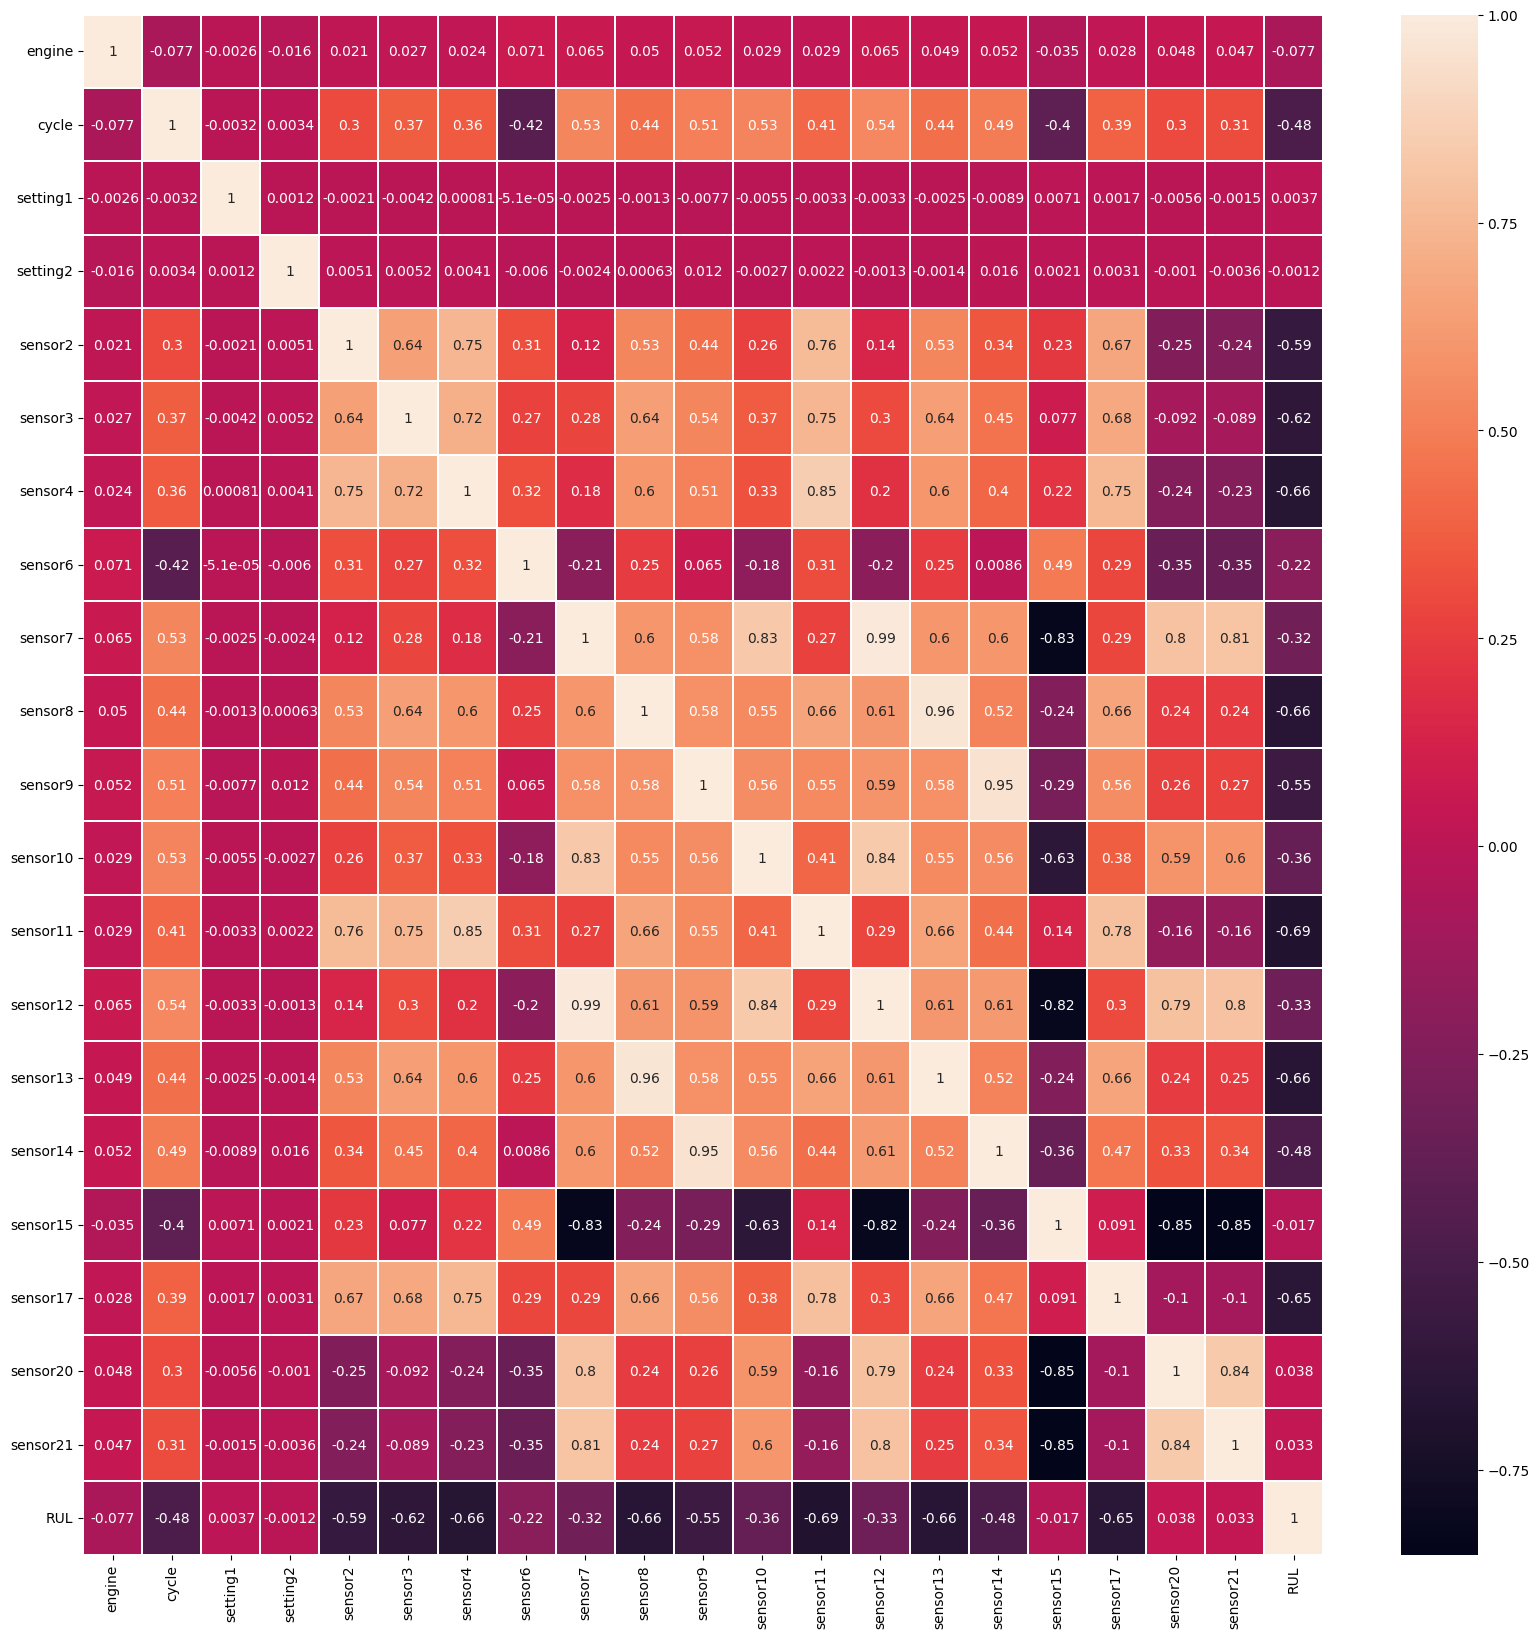

In [56]:
## Defining the function to plot heatmap.

def heat_map(df):
    sns.heatmap(df.corr(),annot=True,linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(20,20)
    plt.show()
heat_map(train3)

Observation: 'engine', 'setting1', 'setting2', 'sensor6' are least correalted with any other features

In [57]:
## Defining the function for boxplots.

def box_plot(df,col):
    fig=px.box(df,x=col)
    fig.show()

In [58]:
## Box plots of sensors of 'train3' Dataframe after removing least correlated sensors.

sensors3=train3.drop(columns=['engine', 'cycle', 'setting1', 'setting2', 'sensor6', 'sensor6', 'RUL'])
sensors3=sensors3.columns

for sensor3 in sensors3:
    box_plot(train3,sensor3)

Observation: Columns 'engine', 'cycle', 'setting1', 'setting2', 'sensor6', 'sensor10', 'RUL' are useless in 'train3' for model so we will drop them while doing train-test spliting.

In [61]:
# Optional: drop features (set here as an example, drop constant sensors)
drop_sensors = [
    "sensor6", "sensor10"]
train3.drop(columns=drop_sensors, inplace=True)
test3.drop(columns=drop_sensors, inplace=True)

In [62]:
# Prepare data for LSTM: normalization
feature_cols = [c for c in train3.columns if c not in ['engine','cycle','RUL']]
scaler = MinMaxScaler()
train3[feature_cols] = scaler.fit_transform(train3[feature_cols])
test3[feature_cols] = scaler.transform(test3[feature_cols])

In [63]:
train3.head()

engine  cycle  setting1  setting2   sensor2   sensor3   sensor4   sensor7  \
0       1      1  0.470930  0.769231  0.355972  0.370523  0.308580  0.208812   
1       1      2  0.546512  0.230769  0.388759  0.399100  0.309360  0.236590   
2       1      3  0.418605  0.307692  0.313817  0.353298  0.445398  0.230843   
3       1      4  0.383721  0.538462  0.487119  0.417107  0.237285  0.268199   
4       1      5  0.593023  0.461538  0.196721  0.476218  0.321217  0.245690   

    sensor8   sensor9  sensor11  sensor12  sensor13  sensor14  sensor15  \
0  0.623529  0.204233  0.348571  0.231279  0.642857  0.239116  0.647755   
1  0.647059  0.202431  0.308571  0.236882  0.654762  0.278567  0.685659   
2  0.664706  0.241484  0.302857  0.217015  0.636905  0.264526  0.564462   
3  0.647059  0.215326  0.314286  0.240448  0.684524  0.245612  0.558909   
4  0.670588  0.268799  0.262857  0.245033  0.654762  0.252109  0.556736   

   sensor17  sensor20  sensor21  RUL  
0  0.272727  0.559524  0.446331  258  
1  0.363636  0.488095  0.534836  257  
2  0.272727  0.404762  0.458577  256  
3  0.363636  0.470238  0.391966  255  
4  0.363636  0.577381  0.543371  254

In [64]:
# Prepare sequences
def gen_sequence(id_df, seq_length, features):
    # group by engine
    data_array = id_df[features].values
    seqs = []
    for start in range(len(id_df)-seq_length+1):
        seqs.append(data_array[start:start+seq_length])
    return seqs

def gen_targets(id_df, seq_length, label):
    y = id_df[label].values[seq_length-1:]
    return y

SEQ_LENGTH = 30  # can adjust

In [69]:
x_train, y_train = [], []
for unit in train3['engine'].unique():
    unit_df = train3[train3['engine']==unit]
    x_train += gen_sequence(unit_df, SEQ_LENGTH, feature_cols)
    y_train += list(gen_targets(unit_df, SEQ_LENGTH, 'RUL'))
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [70]:
# Test data sequence prep
x_test, y_test = [], []
for unit in test3['engine'].unique():
    unit_df = test3[test3['engine']==unit]
    # Only take last SEQ_LENGTH cycles for each unit
    if len(unit_df) >= SEQ_LENGTH:
        x_test.append(unit_df[feature_cols].values[-SEQ_LENGTH:])
    else:
        # Padding if needed
        pad = np.zeros((SEQ_LENGTH-len(unit_df), len(feature_cols)))
        seq = np.vstack([pad, unit_df[feature_cols].values])
        x_test.append(seq)
x_test = np.asarray(x_test)
y_test = rul_df.values.flatten()  # One RUL per engine


In [71]:
# Build simple LSTM
model = Sequential([
    LSTM(100, input_shape=(SEQ_LENGTH, len(feature_cols)), activation='tanh'),
    Dense(50, activation='relu'),
    Dense(1)
])

2025-10-27 23:03:11.222021: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
# Early stopping for faster training
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=2, callbacks=[es])


Epoch 1/50
154/154 - 10s - 68ms/step - loss: 15506.9277 - val_loss: 12798.1592
Epoch 2/50
154/154 - 7s - 44ms/step - loss: 8431.0684 - val_loss: 11970.2324
Epoch 3/50
154/154 - 7s - 44ms/step - loss: 8386.7373 - val_loss: 11997.1836
Epoch 4/50
154/154 - 7s - 43ms/step - loss: 8372.3926 - val_loss: 11975.9727
Epoch 5/50
154/154 - 7s - 43ms/step - loss: 8281.8740 - val_loss: 11611.7402
Epoch 6/50
154/154 - 7s - 43ms/step - loss: 6753.3828 - val_loss: 6651.8521
Epoch 7/50
154/154 - 7s - 43ms/step - loss: 3687.4819 - val_loss: 6725.0376
Epoch 8/50
154/154 - 7s - 43ms/step - loss: 3032.9365 - val_loss: 6894.7607
Epoch 9/50
154/154 - 7s - 43ms/step - loss: 2875.9714 - val_loss: 7223.9150
Epoch 10/50
154/154 - 7s - 43ms/step - loss: 2818.1428 - val_loss: 5823.0723
Epoch 11/50
154/154 - 7s - 43ms/step - loss: 2736.4170 - val_loss: 5174.7344
Epoch 12/50
154/154 - 7s - 44ms/step - loss: 2675.6702 - val_loss: 4992.0635
Epoch 13/50
154/154 - 7s - 43ms/step - loss: 2593.6160 - val_loss: 5136.7690
E

In [77]:
print(preds.shape)  # Number of predictions
print(y_test.shape) # Number of test RUL values


(100,)
(200,)


In [76]:
# Predict and evaluate
preds = model.predict(x_test).flatten()
mse = np.mean((preds-y_test)**2)
mae = np.mean(np.abs(preds-y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


ValueError: operands could not be broadcast together with shapes (100,) (200,) 

In [75]:
print(f"Test MAE: {mae:.2f} | Test MSE: {mse:.2f}")

NameError: name 'mae' is not defined